In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
c1 = np.array([[1,2,1],
               [2,3,1],
               [3,3,1],
               [4,5,1],
               [5,5,1]])
c2 = np.array([[1,0,2],
               [2,1,2],
               [3,1,2],
               [3,2,2],
               [5,3,2],
               [6,5,2]])

In [111]:
c = np.vstack((c1,c2))[:,:-1]

def PCA(sample, dimension):
    mean = np.mean(sample,axis=0)
    data = sample-mean
    cov = np.cov(sample.T)
    eigenValue, eigenVec = np.linalg.eig(cov)
    print(eigenValue)
    selectedVec = eigenVec[:,-dimension:]
    for i in range(dimension):
        selectedVec[:,i] = selectedVec[:,i]/np.linalg.norm(selectedVec[:,i])
    out = np.dot(data, selectedVec)
    return out,selectedVec

sampleAfter,selectedVec = PCA(c,1)
print(sampleAfter,selectedVec)

[0.63277412 5.14904406]
[[ 2.02722413]
 [ 0.61357268]
 [-0.07331818]
 [-2.21373021]
 [-2.90062107]
 [ 3.48074529]
 [ 2.06709384]
 [ 1.38020298]
 [ 0.6534424 ]
 [-1.44709991]
 [-3.58751194]] [[-0.68689087]
 [-0.72676058]]


<function matplotlib.pyplot.show(close=None, block=None)>

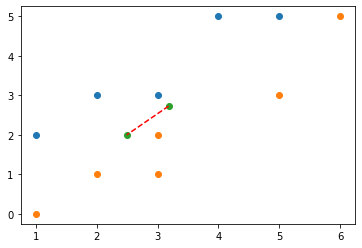

In [105]:
x1 = c1[:,0]
y1 = c1[:,1]
plt.scatter(x1,y1)
x2 = c2[:,0]
y2 = c2[:,1]
plt.scatter(x2,y2)
mean = np.mean(c,axis=0)
x1 = mean[0]
y1 = mean[1]
plt.scatter([x1,x1+selectedVec[0]],[y1,y1+selectedVec[1]])
plt.plot([x1,x1+selectedVec[0]],[y1,y1+selectedVec[1]],linestyle="dashed",color="red")
plt.show

In [109]:
c = np.vstack((c1,c2))

def FDA(sample,dimension):
    lableSampleDic = {}
    lableMuDic = {}
    numEveryClass = {}
    mu = np.zeros(sample.shape[1]-1)
    S_w = np.zeros((sample.shape[1]-1,sample.shape[1]-1))
    S_b = np.zeros((sample.shape[1]-1,sample.shape[1]-1))
    for i in range(sample.shape[0]):
        if sample[i,-1] not in lableSampleDic.keys():
            lableSampleDic[sample[i,-1]] = np.array([sample[i,:-1]])
        else:
            lableSampleDic[sample[i,-1]] = np.row_stack((lableSampleDic[sample[i,-1]],sample[i,:-1]))
    for i,k in enumerate(lableSampleDic):
        lableMuDic[k] = np.mean(lableSampleDic[k],axis=0)
        for j in range(lableSampleDic[k].shape[0]):
            S_w = S_w + np.matmul(np.array([lableSampleDic[k][j,:]-lableMuDic[k]]).T,np.array([lableSampleDic[k][j,:]-lableMuDic[k]]))
        mu = mu + lableMuDic[k]
    mu = mu/len(lableMuDic)
    for i,k in enumerate(lableMuDic):
        S_b = S_b + lableSampleDic[k].shape[0]*np.matmul(np.array([lableMuDic[k]-mu]).T,np.array([lableMuDic[k]-mu]))
    #print(S_b)
    eigenValue, eigenVec = np.linalg.eig(np.matmul(np.linalg.inv(S_w),S_b))
    selectedVec = eigenVec[:,-dimension:]
    for i in range(dimension):
        selectedVec[:,i] = selectedVec[:,i]/np.linalg.norm(selectedVec[:,i])
    #print(selectedVec)

    data = sample[:,:-1] - np.mean(sample[:,:-1],axis=0)
    out = np.dot(data, selectedVec)
    
    
    return out,selectedVec

out,selectedVec = FDA(c,1)
print(out)

[[-0.90932634]
 [-0.99011649]
 [-0.32455956]
 [-1.15169679]
 [-0.48613985]
 [ 0.58336782]
 [ 0.50257767]
 [ 1.16813461]
 [ 0.42178753]
 [ 1.00655431]
 [ 0.17941708]]


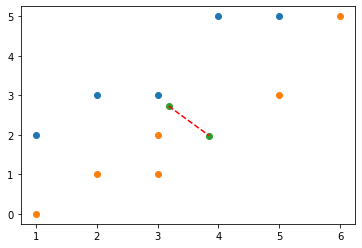

In [110]:
x1 = c1[:,0]
y1 = c1[:,1]
plt.scatter(x1,y1)
x2 = c2[:,0]
y2 = c2[:,1]
plt.scatter(x2,y2)
mean = np.mean(c,axis=0)
plt.scatter([mean[0],mean[0]+selectedVec[0]],[mean[1],mean[1]+selectedVec[1]])
plt.plot([mean[0],mean[0]+selectedVec[0]],[mean[1],mean[1]+selectedVec[1]],linestyle="dashed",color="red")
plt.show()